# Fan power model

Power model for fan [FFB0412UHN-CF00](https://www.delta-fan.com/Download/Spec/FFB0412UHN-CF00.pdf) used in Dell PowerEdge R210

In [8]:
import pandas as pd
import seaborn as sns
import math
from scipy.optimize import curve_fit

In [13]:
def adjust_base_line(df):
    baseline =  df.loc[0]['power_consumption']
    df['power_consumption'] = df['power_consumption'].apply(lambda v: max(0, v - baseline))
    return df

In [52]:
fan1 = adjust_base_line(pd.read_csv('fan_power_data/power_profile_1.csv'))
fan2 = adjust_base_line(pd.read_csv('fan_power_data/power_profile_2.csv'))
fan3 = adjust_base_line(pd.read_csv('fan_power_data/power_profile_3.csv'))

Following fan law, a third-order polynomial is used to represent the power-speed relationship

$P(F)=aF^3+bF^2+cF+d$

In [36]:
f_model = lambda f, a, b, c, d:(a*math.pow(f,3))+(b*math.pow(f,2))+(c*f)+d

def model(v, a, b, c, d):
    return v.apply(lambda f: f_model(f, a, b, c, d))

In [117]:
def fit_and_plot(df):
    popt, _ = curve_fit(f=model, xdata=df['duty_cycle'], ydata=df['power_consumption'], p0=None)
    df['fitted'] = df['duty_cycle'].apply(lambda v: f_model(v, popt[0], popt[1], popt[2], popt[3]))
    ax = sns.scatterplot(x='duty_cycle',y='power_consumption',data=fan1)
    ax.set_ylabel('Fan Power consumption (Watts)')
    ax.set_xlabel('Fan Duty cycle (%)')
    ax = sns.lineplot(x='duty_cycle',y='fitted', data=fan1, linestyle='--', ax=ax,)
    ax.legend(labels=['Measured data', 'Curve fitting'])
    return popt, ax

a=9.046991664441469e-06 b=-0.0004150296584205745 c=0.03282017485009467 d=0.15931680721689004


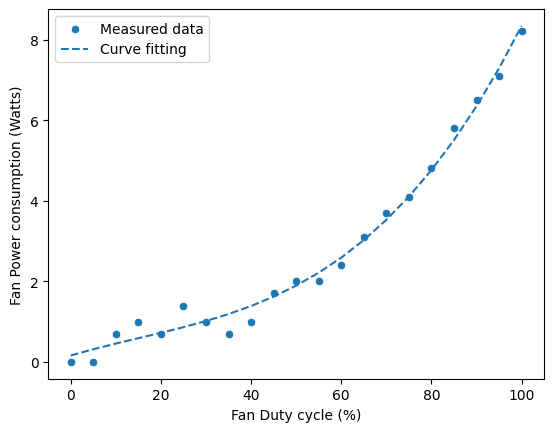

In [121]:
values, ax = fit_and_plot(fan1)
print(f'a={values[0]} b={values[1]} c={values[2]} d={values[3]}')

a=1.2273764796695398e-05 b=-0.0009754222762219425 c=0.04867527017984475 d=-0.013410149493295647


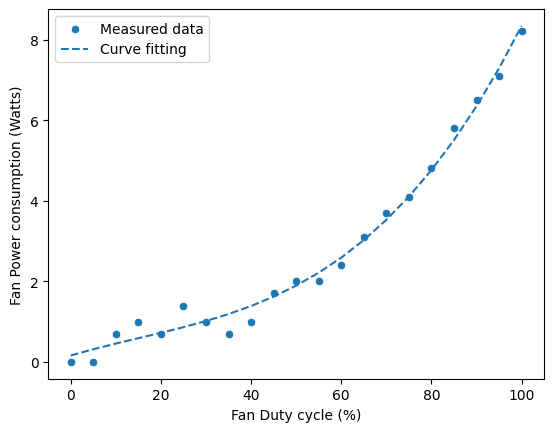

In [122]:
values, ax = fit_and_plot(fan2)
print(f'a={values[0]} b={values[1]} c={values[2]} d={values[3]}')

a=1.507523703894512e-05 b=-0.0013819726351905748 c=0.06599655811657562 d=0.18370983362097834


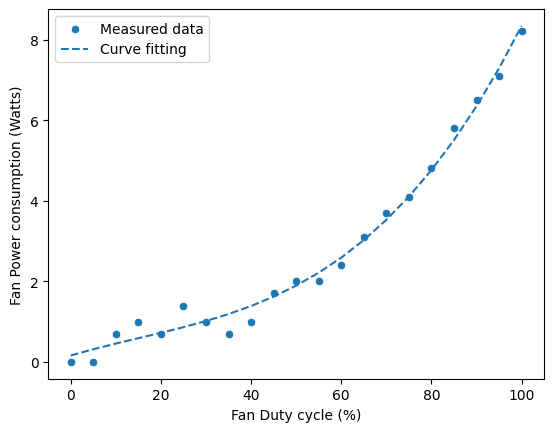

In [123]:
values, ax = fit_and_plot(fan3)
print(f'a={values[0]} b={values[1]} c={values[2]} d={values[3]}')